# Decision Tree Classification (part two)

In [1]:
# the code from the last work book
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC

import pandas as pd
import numpy as np

# import the data
data = load_breast_cancer()

# 1. create a DataFrame of features ; .data()可以获取通过data-*属性存储的值
cancer_df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. normalise the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df = scaler.fit_transform(cancer_df)
cancer_df = pd.DataFrame(df, columns=data.feature_names)

# 3. create a target variable
cancer_target = data.target

# 4. split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer_df, cancer_target, test_size = 0.2)

# 5. fit a decision tree to the training data
tree_model = DTC()
tree_model_fit = tree_model.fit(X_train, Y_train)

In [ ]:
# 在机器学习领域，混淆矩阵（confusion matrix），又称为可能性表格或是错误矩阵。
#它是一种特定的矩阵用来呈现算法性能的可视化效果，通常是监督学习（非监督学习，通常用匹配矩阵：matching matrix）。
#其每一列代表预测值，每一行代表的是实际的类别。这个名字来源于它可以非常容易的表明多个类别是否有混淆（也就是一个class被预测成另一个class）。


In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2) # 结果保留两位小数

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data                     ？？？？
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment. 旋转标记标签并设置它们的对齐方式。
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

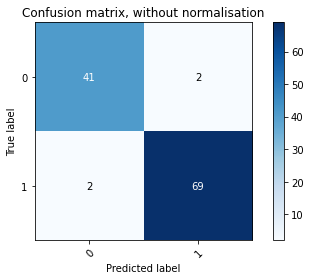

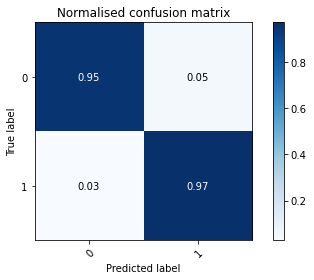

In [3]:
# predict the test data
predicted = tree_model_fit.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [4]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 7}




<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

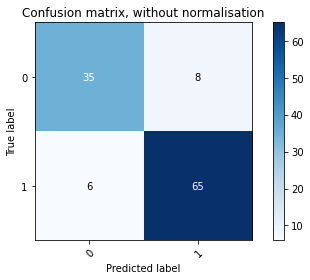

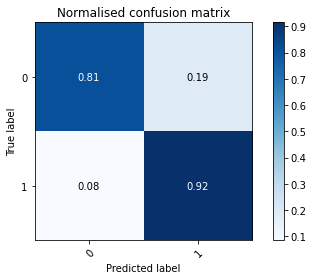

In [5]:
# fit model with new hyperparameters
tree_model = DTC(criterion='entropy', max_depth=5, max_features='log2', min_samples_split=3)
tree_model_fit = tree_model.fit(X_train, Y_train)

# predict the test data
predicted = tree_model_fit.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)